In [ ]:
import keras
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error  

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Realtech_housing_prise/california_housing_train.csv')

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [8]:
df.shape

(17000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Data Visualization**


Text(0.5, 1.0, 'Heat Map for our Data')

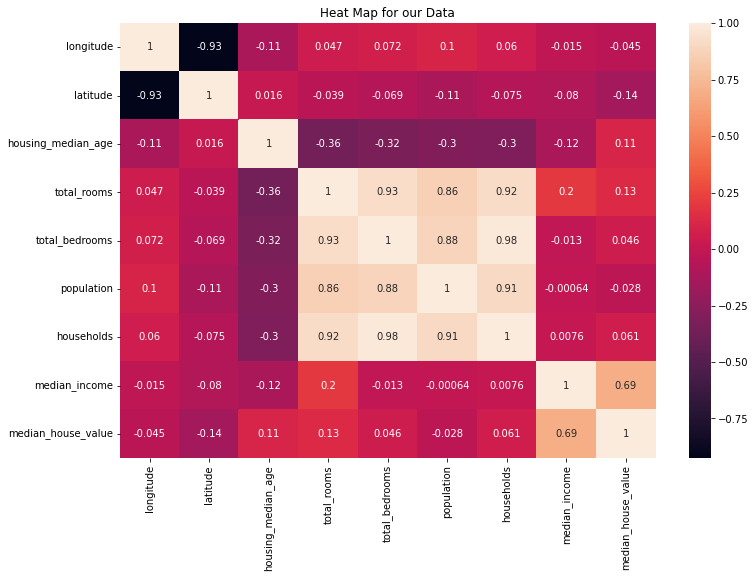

In [16]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True).set_title("Heat Map for our Data")

#### We noticed a strong correlation between "median_income" and "median_house_value"feature. We'll explore this features further.

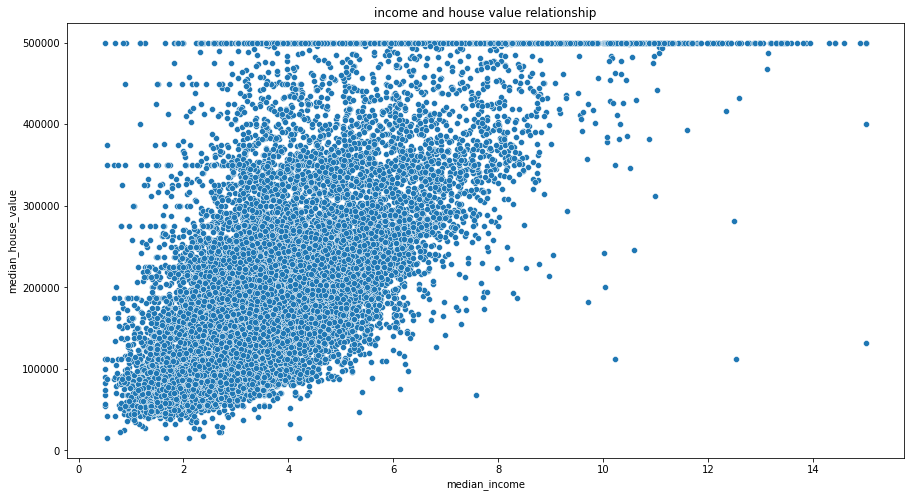

In [17]:
plt.figure(figsize=(15,8))
ax= sns.scatterplot(data=df, x="median_income", y="median_house_value").set_title("income and house value relationship")

### We noticed that there is a specific area where the price is high 

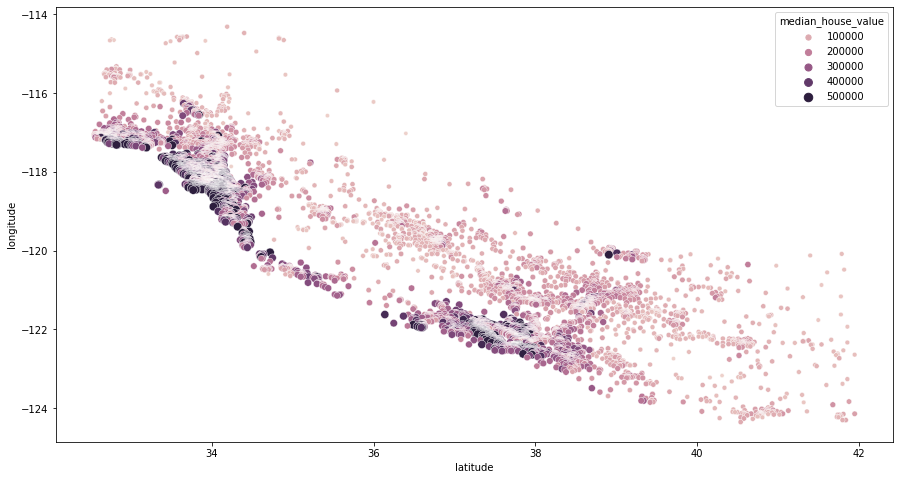

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="latitude", y="longitude", hue=df["median_house_value"], size=df["median_house_value"])

# Modeling and splitting our Data 

In [ ]:
#Data Scaling 
#scaler = StandardScaler()
#df = pd.DataFrame(
   # scaler.fit_transform(df), 
    #columns=df.columns,
   # index=df.index)
#df

In [19]:
X = df.drop(columns=['median_house_value'])
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [20]:
Y =df[['median_house_value']]
Y

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
16995,111400.0
16996,79000.0
16997,103600.0
16998,85800.0


In [21]:
#splitting  all features train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, train_size=0.7)

In [22]:
#creating model with all features 
model1 = keras.Sequential()
model1.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
model1.add(keras.layers.Dense(8, activation='relu'))
#model1.add(keras.layers.Dense(4, activation='relu'))
model1.add(keras.layers.Dense(1))
model1.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')

In [23]:
#fitting all features to the model
model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
372/372 [==============================] - 1s 1ms/step - loss: 55893123072.0000 - mean_squared_error: 55893123072.0000
Epoch 2/100
372/372 [==============================] - 1s 1ms/step - loss: 50239152128.0000 - mean_squared_error: 50239152128.0000
Epoch 3/100
372/372 [==============================] - 0s 1ms/step - loss: 37760262144.0000 - mean_squared_error: 37760262144.0000
Epoch 4/100
372/372 [==============================] - 1s 1ms/step - loss: 27997587456.0000 - mean_squared_error: 27997587456.0000
Epoch 5/100
372/372 [==============================] - 1s 1ms/step - loss: 26890840064.0000 - mean_squared_error: 26890840064.0000
Epoch 6/100
372/372 [==============================] - 1s 1ms/step - loss: 26519961600.0000 - mean_squared_error: 26519961600.0000
Epoch 7/100
372/372 [==============================] - 1s 2ms/step - loss: 26070274048.0000 - mean_squared_error: 26070274048.0000
Epoch 8/100
372/372 [==============================] - 1s 1ms/step - loss: 25352036

In [57]:
## use vis here for showing the rela
y_predict1 =pd.DataFrame(model1.predict(X_test))
y_predict1
y_predict1.index.name='id'
y_test.index.name='id'
result = y_predict1.merge(y_test,on='id')
print(result)
mean_squared_error(y_test.values, y_predict1)

                  0  median_house_value
id                                     
2     218404.031250             85700.0
7     142702.078125             48500.0
14    226004.812500             45000.0
19    336034.687500             27500.0
22    232936.937500             50000.0
...             ...                 ...
5084  194345.968750            323800.0
5085  270219.812500            283000.0
5091  134650.062500            183900.0
5093  177099.656250            173800.0
5096  170499.640625            191900.0

[1561 rows x 2 columns]


8509926780.458321

## we saw that our model not performing right for what we have so we choice the most column effecting on the score of the model wich is the median_income.

In [49]:
#splitting  only one feature "median_income" to train set , and put "median_house_value" to test set
df_income = df[['median_income','median_house_value']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_income['median_income'] , df_income['median_house_value'], train_size=0.7)

In [50]:
#creating model with one feature "median_income"
model2 = keras.Sequential()
model2.add(keras.layers.Dense(4, activation='relu', input_shape=(1,)))
model2.add(keras.layers.Dense(2, activation='relu'))
#model2.add(keras.layers.Dense(4, activation='relu'))
model2.add(keras.layers.Dense(1))
model2.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_squared_error')

In [51]:
#fitting only one "median_income" feature to the model
model2.fit(X_train1,y_train1,epochs=100)

Epoch 1/100
372/372 [==============================] - 1s 1ms/step - loss: 56441393152.0000 - mean_squared_error: 56441393152.0000
Epoch 2/100
372/372 [==============================] - 1s 1ms/step - loss: 56427356160.0000 - mean_squared_error: 56427356160.0000
Epoch 3/100
372/372 [==============================] - 0s 1ms/step - loss: 56397520896.0000 - mean_squared_error: 56397520896.0000
Epoch 4/100
372/372 [==============================] - 1s 1ms/step - loss: 56344608768.0000 - mean_squared_error: 56344608768.0000
Epoch 5/100
372/372 [==============================] - 0s 1ms/step - loss: 56263733248.0000 - mean_squared_error: 56263733248.0000
Epoch 6/100
372/372 [==============================] - 0s 1ms/step - loss: 56152100864.0000 - mean_squared_error: 56152100864.0000
Epoch 7/100
372/372 [==============================] - 1s 1ms/step - loss: 56007409664.0000 - mean_squared_error: 56007409664.0000
Epoch 8/100
372/372 [==============================] - 1s 1ms/step - loss: 55827304

In [63]:
#predict y_test1 column for model2
y_predict2 =pd.DataFrame(model2.predict(X_test1))
y_predict2



mean_squared_error(y_test1.values, y_predict2)
y_test1df=pd.DataFrame(y_test1)
y_test1df

y_predict2.index.name='id'
y_test1df.index.name='id'
result2 = y_predict2.merge(y_test1df,on='id')
print(result2)
mean_squared_error(y_test1df.values, y_predict2)

#result1 = y_predict2.merge(y_test1df,on='id')

                  0  median_house_value
id                                     
0     239953.343750             66900.0
3     172536.281250             73400.0
7     275259.218750             48500.0
11    134756.421875             62000.0
14    230601.109375             45000.0
...             ...                 ...
5089  169586.062500            216600.0
5091  360938.281250            183900.0
5092  195324.734375            197500.0
5097  168658.828125            218400.0
5099  493412.281250            188000.0

[1494 rows x 2 columns]


7336738909.459839

In [ ]:
#model1.save('Realtech_housing_prise.h5')

## this has a beter result but still not that great so we go with LinearRegression


In [ ]:
#test_data_1_column = np.array([-114.60	,33.62	,16.0	,3741.0	,801.0	,2434.0	,824.0	,2.6797	])  num 10
#print(model.predict(test_data_1_column.reshape(1,8),batch_size=1))

In [ ]:
# if you want to load the model use this
#old_model = keras.models.load_model('Realtech_housing_prise.h5')

# LinearRegression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
#رقرشن مودل لكل الاعمدة
reg = LinearRegression()
reg.fit(X_train,y_train)
reg_predict1= reg.predict(X_test)
#reg.score(y_test, predict)
mean_squared_error(y_test.values, reg_predict1)

4789126843.754375

In [ ]:
#رقرشن مودل لعامود "الإنكم "
reg2 = LinearRegression()
reg2.fit(X_train1,y_train1)
reg_predict2= reg2.predict(X_test1)
#mean_squared_error(y_test1.values, predict)